# Fitting Dirac band with parabolic band

In [1]:
from numpy import frompyfunc, linspace, exp, log, pi, zeros, arange
from mpmath import polylog
from scipy.integrate import quad
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size =SMALL_SIZE)
plt.rc('legend', fontsize = SMALL_SIZE)
plt.rc('xtick', labelsize = MEDIUM_SIZE)
plt.rc('ytick', labelsize = MEDIUM_SIZE)
plt.rc('axes', labelsize = BIGGER_SIZE)

In [2]:
# Specific treatment for polylogarithm function

plog = frompyfunc(polylog, 2,1)

### Tune Band Gap

In [3]:
delta = 6

## Dirac Band 

In [4]:
infinity = 100  # this value is sufficient for our function


# Define Kernel:

## conduction band
def F0c(x):
    return exp(x)/(1+exp(x))
def F1c(x):
    return ( x/(1+exp(x)) + log(1+exp(-x)) )
def F2c(x):
    return ( (pi**2)/3 - (x**2 / (1+exp(x)) )
            - 2*x*log(1+exp(-x)) + 2*plog(2,-exp(-x)) )
def F3c(x):
    return ( (x**3)/(1+exp(x)) + 3*(x**2)*log(1+exp(-x)) - 6*x*plog(2,-exp(-x)) - 6*plog(3,-exp(-x)) )

def G0c(xx,D):
    def integrand(x, xx):
        return (1 / (x + xx)) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D, infinity, args=(xx))
    return I
def G1c(xx,D):
    def integrand(x, xx):
        return (x / (x + xx)) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D, infinity, args=(xx))
    return I
def G2c(xx,D):
    def integrand(x, xx):
        return (x**2 / (x + xx)) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D, infinity, args=(xx))
    return I

## valence band
def F0v(x):
    return 1/(1+exp(x))
def F1v(x):
    return ( -x/(1+exp(x)) - log(1+exp(-x)) )
def F2v(x):
    return ( (x**2 / (1+exp(x)) ) + 2*x*log(1+exp(-x))
            - 2*plog(2,-exp(-x)) )
def F3v(x):
    return ( -(x**3)/(1+exp(x)) - 3*(x**2)*log(1+exp(-x)) + 6*x*plog(2,-exp(-x)) + 6*plog(3,-exp(-x)) )

def G0v(xx,D):
    def integrand(x, xx):
        return (1 / (x + xx)) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infinity, -D, args=(xx))
    return I
def G1v(xx,D):
    def integrand(x, xx):
        return (x / (x + xx)) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infinity, -D, args=(xx))
    return I
def G2v(xx,D):
    def integrand(x, xx):
        return (x**2 / (x + xx)) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infinity, -D, args=(xx))
    return I

# ZT function:
def ZT(Seeb,Sig,KappaE,KappaP):
    return (Seeb**2 * Sigma)/(KappaE + KappaP)

# Create sample points within [-10,10]:
npoint  = 101
eta     = linspace(-10, 10, npoint) 

L0c     = zeros(npoint,float)
L1c     = zeros(npoint,float)
L2c     = zeros(npoint,float)

L0v     = zeros(npoint,float)
L1v     = zeros(npoint,float)
L2v     = zeros(npoint,float)

S_c     = zeros(npoint,float)
Sigma_c = zeros(npoint,float)
kappa_c = zeros(npoint,float)

S_v     = zeros(npoint,float)
Sigma_v = zeros(npoint,float)
kappa_v = zeros(npoint,float)

S       = zeros(npoint,float)
Sigma   = zeros(npoint,float)
kappae  = zeros(npoint,float)

for i in range(eta.size):
    L0c[i] = F1c(eta[i] - delta) + eta[i] * F0c(eta[i] - delta) - delta**2 * G0c(eta[i],delta-eta[i])
    L1c[i] = F2c(eta[i] - delta) + eta[i] * F1c(eta[i] - delta) - delta**2 * G1c(eta[i],delta-eta[i])
    L2c[i] = F3c(eta[i] - delta) + eta[i] * F2c(eta[i] - delta) - delta**2 * G2c(eta[i],delta-eta[i])
    L0v[i] = -1 * (F1v(eta[i] + delta) + eta[i] * F0v(eta[i] + delta) - delta**2 * G0v(eta[i],delta+eta[i]))
    L1v[i] = -1 * (F2v(eta[i] + delta) + eta[i] * F1v(eta[i] + delta) - delta**2 * G1v(eta[i],delta+eta[i]))
    L2v[i] = -1 * (F3v(eta[i] + delta) + eta[i] * F2v(eta[i] + delta) - delta**2 * G2v(eta[i],delta+eta[i]))   
    
# TE quantities:
S_c     = -L1c / L0c
S_v     = -L1v / L0v
Sigma_c =  L0c
Sigma_v =  L0v
Kappa_c =  L2c - (L1c**2 / L0c)
Kappa_v =  L2v - (L1v**2 / L0v)

Sigma   =  Sigma_c + Sigma_v
S       = (Sigma_c * S_c + Sigma_v * S_v) / Sigma
Kappae  = ( (Kappa_c + Kappa_v)
          + (Sigma_c * Sigma_v)*(S_c - S_v)**2 / (Sigma) )

## Parabolic Band 

In [5]:
# Define kernel:
## conduction band
def F0cc(xx):
    return exp(xx)/(1+exp(xx))
def F1cc(xx):
    return ( xx/(1+exp(xx)) + log(1+exp(-xx)) )
def F2cc(xx):
    return ( (pi**2)/3 - (xx**2 / (1+exp(xx)) )
            - 2*xx*log(1+exp(-xx)) + 2*plog(2,-exp(-xx)) )
def F3cc(xx):
    return ( (xx**3)/(1+exp(xx)) + 3*(xx**2)*log(1+exp(-xx)) - 6*xx*plog(2,-exp(-xx)) - 6*plog(3,-exp(-xx)) )

## valence band
def F0vv(xx):
    return -1/(1+exp(xx))
def F1vv(xx):
    return ( xx/(1+exp(xx)) + log(1+exp(-xx)) )
def F2vv(xx):
    return -( (xx**2 / (1+exp(xx)) ) + 2*xx*log(1+exp(-xx))
            - 2*plog(2,-exp(-xx)) )
def F3vv(xx):
    return ( (xx**3)/(1+exp(xx)) + 3*(xx**2)*log(1+exp(-xx)) - 6*xx*plog(2,-exp(-xx)) - 6*plog(3,-exp(-xx)) )

# ZT function:
def ZT1(Seeb,Sig,KappaE,KappaP):
    return (Seeb**2 * Sig)/(KappaE + KappaP)

# Create sample points within [-10,10]:
npoint  = 101
eta     = linspace(-10, 10, npoint) 

# TE quantities:
etac= eta-delta
etav= eta+delta

L0cc = 2*F1cc(etac) + ((etac)*2*F0cc(etac))
L1cc = 2*F2cc(etac) + ((etac)*2*F1cc(etac))
L2cc = 2*F3cc(etac) + ((etac)*2*F2cc(etac))

L0vv = 2*F1vv(etav)+(etav*2*F0vv(etav))
L1vv = 2*F2vv(etav)+(etav*2*F1vv(etav))
L2vv = 2*F3vv(etav)+(etav*2*F2vv(etav))

S_cc     = -L1cc / L0cc
Sigma_cc = L0cc
kappa_cc = L2cc - (L1cc**2 / L0cc)

S_vv     = -L1vv/L0vv
Sigma_vv = L0vv
kappa_vv = L2vv - (L1vv**2/L0vv)

Sigma1   = Sigma_cc + Sigma_vv
S1       = (Sigma_cc * S_cc + Sigma_vv * S_vv) / Sigma1
Kappae1  = ( (kappa_cc + kappa_vv)
          + (Sigma_cc * Sigma_vv)*(S_cc - S_vv)**2 / (Sigma1) )


## Plotting 

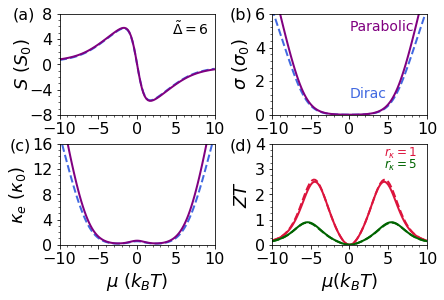

In [22]:
# Define the size of the entire plot
plt.figure(figsize=(6,4))

#Blue line for Dirac Band
#Red Line for Parabolic Band

# Subplot (a): Seebeck's coefficient
ax1 = plt.subplot(2,2,1)
plt.plot(eta, S, color='royalblue', linestyle='--', lw=2)
plt.plot(eta, S1, color='purple', linestyle='-', lw=2)
plt.ylabel('$S$ $(S_0)$')
plt.axis([-10,10,-8,8]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-10,11,5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.yticks(range(-8,9,4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.labelpad = -4
plt.text(4.5,4.7, r'$\tilde{\Delta} = 6$', fontsize=14)
plt.text(-16,7.2,'(a)',fontsize=16)

# Subplot (b): Electrical conductivity
ax2 = plt.subplot(2,2,2)
plt.plot(eta, Sigma, color='royalblue', linestyle='--', lw=2)
plt.plot(eta, Sigma1, color='purple', linestyle='-', lw=2)
plt.ylabel('$\sigma$ $(\sigma_0)$')
plt.axis([-10,10,0,6]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-10,11,5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.yticks(arange(0,7,step=2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.text(-15.5,5.7,'(b)',fontsize=16)
plt.text(0, 1.0, 'Dirac', color='royalblue', fontsize=14)
plt.text(0, 5, 'Parabolic', color='purple', fontsize=14)


# Subplot (c): Thermal conductivity (electron part)
ax3 = plt.subplot(2,2,3)
plt.plot(eta, Kappae, color='royalblue', linestyle='--', lw=2)
plt.plot(eta, Kappae1, color='purple', linestyle='-', lw=2)
plt.xlabel('$\mu$ $(k_B T)$')
plt.ylabel('$\kappa_e$ $(\kappa_0)$')
plt.axis([-10,10,0,12]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-10,11,5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.yticks(range(0,17,4))
ax3.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.text(-16.5,15,'(c)',fontsize=16)

# Subplot (d): ZT
ax4 = plt.subplot(2,2,4)
plt.plot(eta, ZT(S, Sigma, Kappae, 1), color='crimson', linestyle='--', lw=2)
plt.plot(eta, ZT(S1, Sigma1, Kappae1, 1), color='crimson', linestyle='-', lw=2)
plt.plot(eta, ZT(S, Sigma, Kappae, 5), color='darkgreen', linestyle='--', lw=2)
plt.plot(eta, ZT(S1, Sigma1, Kappae1, 5), color='darkgreen', linestyle='-', lw=2)
plt.xlabel('$\mu (k_B T)$')
plt.ylabel('$ZT$')
plt.axis([-10,10,0,4]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-10,11,5))
ax4.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.yticks(arange(0,4.1,step=1))
ax4.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.text(4.5,3.5, r'$r_\kappa = 1$', fontsize=12, color='crimson')
plt.text(4.5, 3, r'$r_\kappa = 5$', fontsize=12, color='darkgreen')
plt.text(-15.5,3.75,'(d)',fontsize=16)

# Save Figure
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=0.1)
plt.savefig('paraFigFitDirac.pdf')